In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

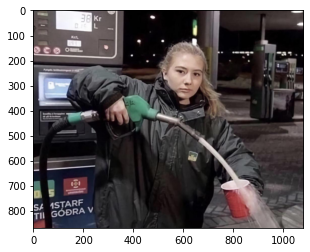

In [ ]:
image_color = cv2.imread('/content/test_img.jpg')  # example image
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
plt.imshow(image_color)

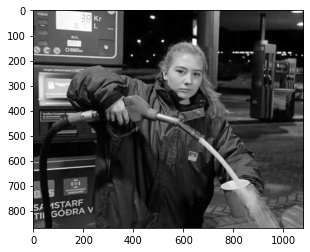

In [ ]:
image = image_color.mean(2)          #mean of rgb channels to get grayscale
plt.imshow(image,cmap='gray')

Raw convolution function (no rescaling)

In [ ]:
def convolve (image,mask):              # only for odd masks
  img_out = np.zeros (image.shape)      # create empty image array for output
  mask_size = mask.shape[0]
  left = (int) ((mask_size - 1) / 2)    # left and right as padding variables
  right = mask_size - left              # will leave cushion for kernel 

  for row in range(left, image.shape[0] - right + 1):
    for col in range(left, image.shape[1] - right + 1):
        value = mask * image[(row - left):(row + right), (col - left):(col + right)]
        img_out[row, col] = value.sum() # straight assignment +ve or -ve
  return img_out

Enhanced convolution function (rescaled to 0-255)

In [ ]:
def en_convolve (image,mask):           # made this version for quick rough
  img_out = np.zeros (image.shape)      # comparision whenever desired
  mask_size = mask.shape[0]                
  left = (int) ((mask_size - 1) / 2)    
  right = mask_size - left

  for row in range(left, image.shape[0] - right + 1):
    for col in range(left, image.shape[1] - right + 1):
        value = mask * image[(row - left):(row + right), (col - left):(col + right)]
        img_out[row, col] = min(255, max(0, value.sum())) # restricted to 8-bit
  return img_out

Detecting zero crossing + checking gradient with threshold + marking edges

In [ ]:
def mark_edges (image,threshold):
  img_out = np.zeros((image.shape[0]-2,image.shape[1]-2))  # empty image with 1 pixel border cut
  for row in range(1, image.shape[0]-1):
    for col in range(1, image.shape[1]-1):
      x = ((0,1),(1,0),(1,1),(-1,1))                       # to cover neighbors of pixel in focus, pairwise
      for i,j in x:                                        # 4 repeat cases, no problem
          if image[row+i,col+j] * image[row-i,col-j] != 0:
            abs_first_der = abs(image[row+i,col+j]-image[row-i,col-j])/2 # approximation by difference
            if abs_first_der >= threshold:                 # check with threshold
              img_out[row-1,col-1] = 255                   # mark pixel as edge
  return img_out


Filter and output pipeline

In [ ]:
def filter (mask,threshold):
  plt.imshow(mark_edges(convolve(image,mask),threshold),cmap='gray')

Masks

In [ ]:
mask_log1 = np.array([[1,1,1],[1,-8,1],[1,1,1]])      # 3*3 LoG type 1
mask_log2 = np.array([[0,1,0],[1,-4,1],[0,1,0]])      # 3*3 LoG type 2
mask_log3 = np.array([[0,0,1,0,0],[0,1,2,1,0],
             [1,2,-16,2,1],[0,1,2,1,0],[0,0,1,0,0]])  # 5*5 LoG type 2
mask_priwetx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # 3*3 priwet_x             
mask_sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])  # 3*3 sobel_x
mask_sobely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])  # 3*3 sobel_y


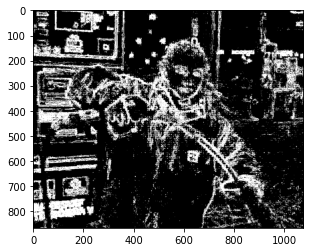

In [ ]:
filter(mask_log1,15)

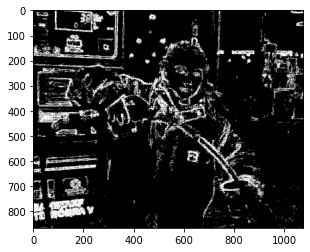

In [ ]:
filter(mask_log1,25)

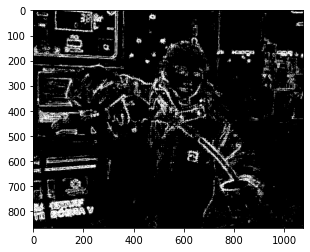

In [ ]:
filter(mask_log2,12)

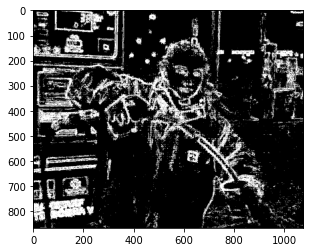

In [ ]:
filter(mask_log3,40)

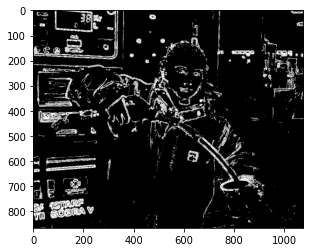

In [ ]:
 plt.imshow(mark_edges(ndimage.gaussian_laplace(image, sigma=1),5),cmap='gray')

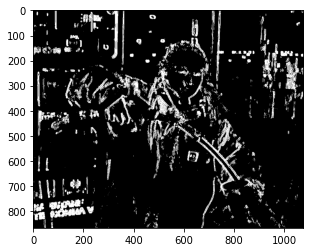

In [ ]:
filter(mask_priwetx,25)

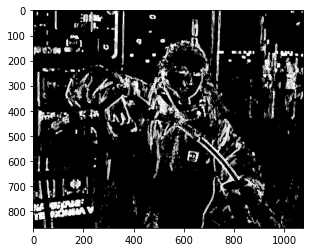

In [ ]:
filter(mask_sobelx,30)

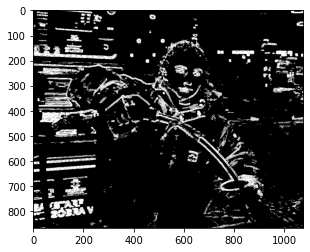

In [ ]:
filter(mask_sobely,35)